In [117]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input , decode_predictions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOADING DATASET**

In [ ]:
#Since the dataset was small , i did not divide the dataset into three parts as usually done.

IMAGE_SIZE  = (224 , 224)
train_data = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/datasets/rural_and_urban_photos/train',
    image_size = IMAGE_SIZE
)

test_data = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/datasets/rural_and_urban_photos/val',
    image_size = IMAGE_SIZE
)

Found 72 files belonging to 2 classes.
Found 20 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
print(class_names)

['rural', 'urban']


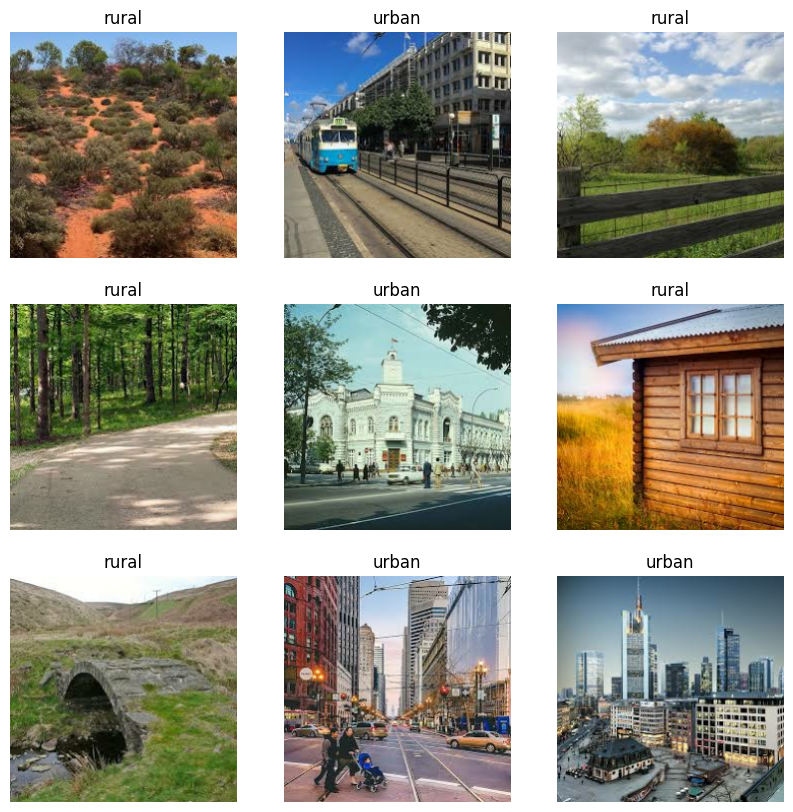

In [ ]:
plt.figure(figsize=(10 , 10))
i = 1
for images , labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot( 3 , 3 , i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


**IMAGE AUGMENTATION**

In [ ]:
augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.2)
])

**MODEL CREATION**

In [ ]:
inputs = keras.layers.Input(shape=(224 , 224 , 3))
x = augmentation(inputs)
x = preprocess_input(x)
x = ResNet50(input_shape=(224 , 224 , 3) ,include_top=False , weights='imagenet')(x)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1 , activation = 'sigmoid')(x)

model = keras.Model(inputs = inputs ,outputs =outputs)

In [ ]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_1  (None, 224, 224, 3)       0         
 0 (SlicingOpLambda)                                             
                                                                 
 tf.nn.bias_add_10 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_8  (None, 2048)              0   

In [ ]:
layer = model.get_layer("resnet50")
layer.trainable = False

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data , epochs = 5 , validation_data = test_data)

Epoch 1/5
3/3 [==============================] - 26s 7s/step - loss: 0.8061 - accuracy: 0.4861 - val_loss: 0.4511 - val_accuracy: 0.8500
Epoch 2/5
3/3 [==============================] - 26s 9s/step - loss: 0.4542 - accuracy: 0.7500 - val_loss: 0.3183 - val_accuracy: 0.9000
Epoch 3/5
3/3 [==============================] - 26s 9s/step - loss: 0.3198 - accuracy: 0.9306 - val_loss: 0.2311 - val_accuracy: 0.9500
Epoch 4/5
3/3 [==============================] - 17s 5s/step - loss: 0.2489 - accuracy: 0.9167 - val_loss: 0.1850 - val_accuracy: 0.9500
Epoch 5/5
3/3 [==============================] - 17s 6s/step - loss: 0.1589 - accuracy: 0.9722 - val_loss: 0.1535 - val_accuracy: 1.0000


**MODEL EVALUATION**

In [ ]:
model.evaluate(test_data)

1/1 [==============================] - 6s 6s/step - loss: 0.1535 - accuracy: 1.0000


[0.15349166095256805, 1.0]

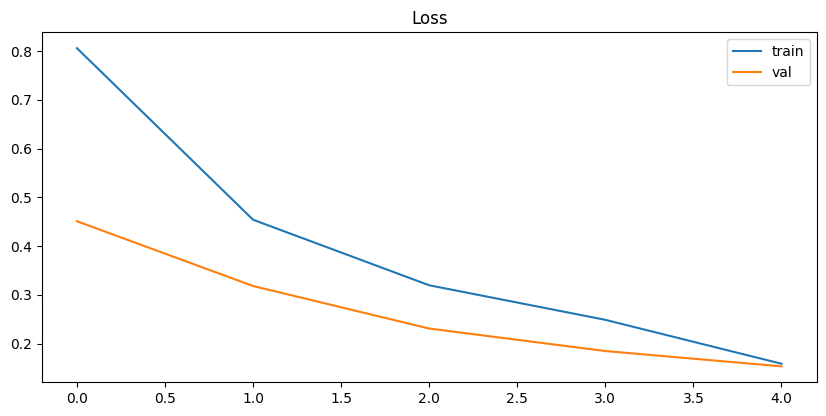

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Loss")
plt.plot(history.history['loss'] , label = 'train')
plt.plot(history.history['val_loss'] , label = 'val')
plt.legend()

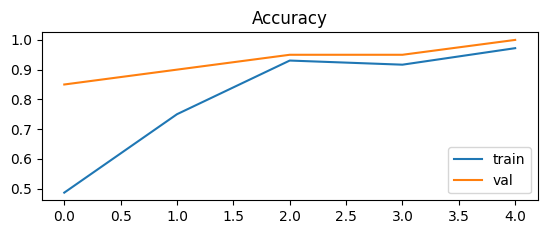

In [ ]:
plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history['accuracy'] , label = 'train')
plt.plot(history.history['val_accuracy'] , label = 'val')
plt.legend()

In [ ]:
#The validation scores are better than the training scores because the validation scores are evaluated after a trainin epoch and the model has learned during the last training epoch.

In [118]:
#I have used different data for inference
inference_data = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/datasets/rural_and_urban_photos/inference',
    image_size = IMAGE_SIZE
)

Found 2 files belonging to 2 classes.


In [ ]:
preds = model.predict(inference_data)

1/1 [==============================] - 0s 471ms/step


In [ ]:
preds = tf.reshape(preds , [2])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 1], dtype=int32)>

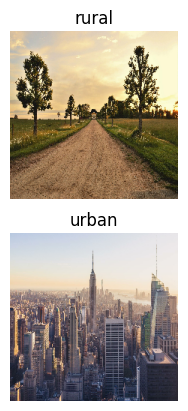

In [ ]:
for images , labels in inference_data:
  for i in range(2):
    ax = plt.subplot( 2 , 1 , i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[preds[i]])
    plt.axis("off")